In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Classification

PROBLEM STATEMENT

You own an online clothing business and you would like to develop a new app (or in-store) feature in which customers would enter their own height and weight and the system would predict what T-shirt size should they wear. Features are height and weight and output is either L (Large) or S (Small).

In [23]:
Tshirt = pd.read_csv("Tshirt_Sizing_Dataset.csv")

In [24]:
Tshirt.head()

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S


In [25]:
X = Tshirt.iloc[:, 0:2].values
X

array([[158,  58],
       [158,  59],
       [158,  63],
       [160,  59],
       [160,  60],
       [163,  60],
       [163,  61],
       [160,  64],
       [163,  64],
       [165,  61],
       [165,  62],
       [165,  65],
       [168,  62],
       [168,  63],
       [168,  66],
       [170,  63],
       [170,  64],
       [170,  68]])

In [26]:
y = Tshirt.iloc[:, 2].values
y

array(['S', 'S', 'S', 'S', 'S', 'S', 'S', 'L', 'L', 'L', 'L', 'L', 'L',
       'L', 'L', 'L', 'L', 'L'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder
le_y = LabelEncoder()

y = le_y.fit_transform(y)

In [28]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [31]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

In [34]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
X_test

array([[165,  65],
       [170,  64],
       [163,  60],
       [163,  64],
       [158,  63]])

In [35]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 1])

In [46]:
classifier.predict([[163,66]])

array([0])

In [36]:
X_test

array([[165,  65],
       [170,  64],
       [163,  60],
       [163,  64],
       [158,  63]])

In [38]:
Tshirt

,Height (in cms),Weight (in kgs),T Shirt Size
0,158,58,S
1,158,59,S
2,158,63,S
3,160,59,S
4,160,60,S
5,163,60,S
6,163,61,S
7,160,64,L
8,163,64,L
9,165,61,L


In [39]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

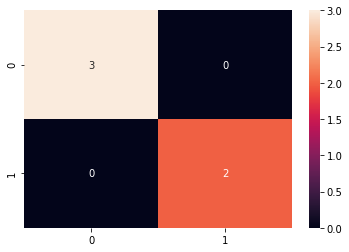

In [40]:
sns.heatmap(cm, annot=True, fmt="d")

###<font color='cyan'> Decison Tree Algorithm </font>

PROBLEM STATEMENT

Kyphosis is an abnormally excessive convex curvature of the spine. The kyphosis data frame has 81 rows and 4 columns. representing data on children who have had corrective spinal surgery. Dataset contains 3 inputs and 1 output INPUTS:

Age: in months Number: the number of vertebrae involved Start: the number of the first (topmost) vertebra operated on. OUTPUTS:

Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation. Link to the dataset: https://www.kaggle.com/abbasit/kyphosis-dataset

Source: John M. Chambers and Trevor J. Hastie eds. (1992) Statistical Models in S, Wadsworth and Brooks/Cole, Pacific Grove, CA.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [48]:
Kyphosis_df = pd.read_csv("kyphosis.csv")
Kyphosis_df.head(10)

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
5,absent,1,2,16
6,absent,61,2,17
7,absent,37,3,16
8,absent,113,2,16
9,present,59,6,12


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


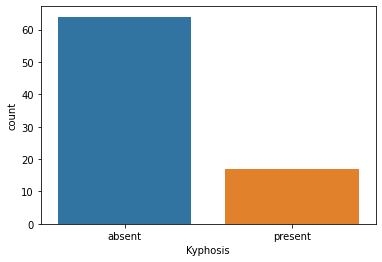

In [49]:
sns.countplot(Kyphosis_df['Kyphosis'], label = "Count")

In [50]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
Kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(Kyphosis_df['Kyphosis'])

In [51]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


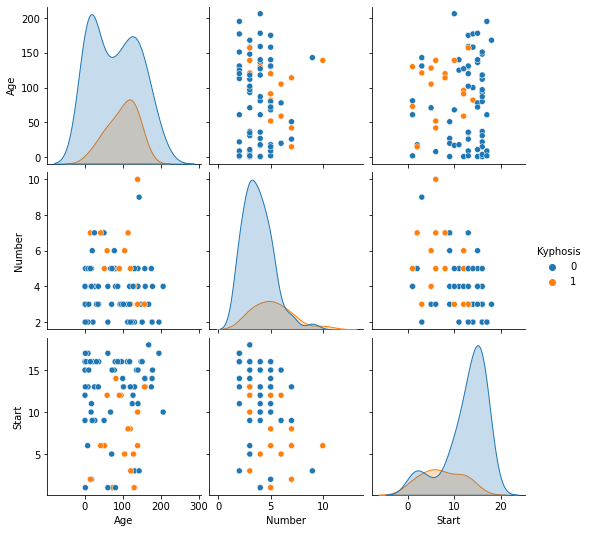

In [52]:
sns.pairplot(Kyphosis_df, hue='Kyphosis', vars = ['Age', 'Number', 'Start'])

In [53]:
Kyphosis_True = Kyphosis_df[Kyphosis_df['Kyphosis']==1]
Kyphosis_False = Kyphosis_df[Kyphosis_df['Kyphosis']==0]

In [54]:
print('Disease present after operation % =', (len(Kyphosis_True) / len(Kyphosis_df) )*100,"%")

Disease present after operation % = 20.98765432098765 %


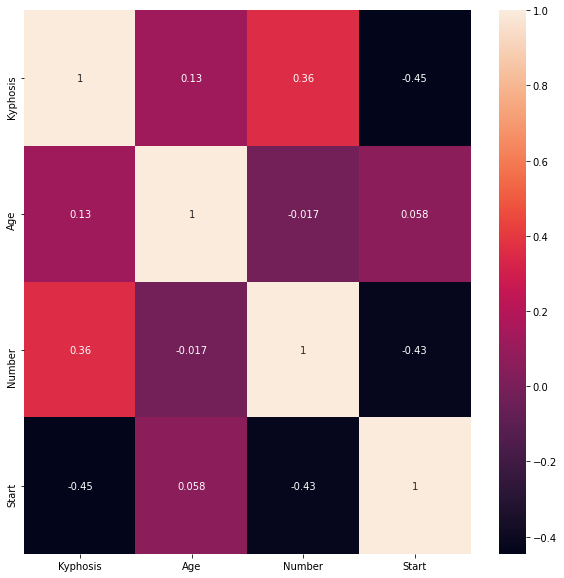

In [55]:
plt.figure(figsize=(10,10)) 
sns.heatmap(Kyphosis_df.corr(), annot=True)

In [56]:
# Let's drop the target label coloumns
X = Kyphosis_df.drop(['Kyphosis'],axis=1)
y = Kyphosis_df['Kyphosis']

In [57]:
X

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56, 3), (25, 3), (56,), (25,))

In [60]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [63]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [64]:
feature_importances

,importance
Age,0.417245
Number,0.383324
Start,0.199430


In [65]:
decision_tree.feature_importances_

array([0.41724542, 0.38332438, 0.1994302 ])

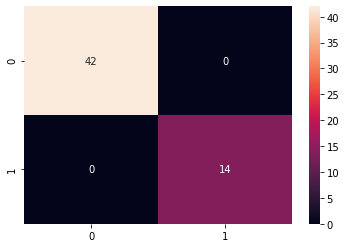

In [66]:
from sklearn.metrics import classification_report, confusion_matrix


y_predict_train = decision_tree.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

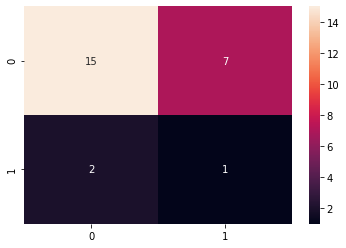

In [67]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [68]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        22
           1       0.12      0.33      0.18         3

    accuracy                           0.64        25
   macro avg       0.50      0.51      0.48        25
weighted avg       0.79      0.64      0.70        25



# Logististic Regression

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# read the data using pandas dataframe
training_set = pd.read_csv('Facebook_Ads_2.csv', encoding='ISO-8859-1')

In [73]:
# Show the data head!
training_set.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


In [74]:
click    = training_set[training_set['Clicked']==1]
no_click = training_set[training_set['Clicked']==0]

print("Total =", len(training_set))

print("Number of customers who clicked on Ad =", len(click))
print("Percentage Clicked =", 1.*len(click)/len(training_set)*100.0, "%")
 
print("Did not Click =", len(no_click))
print("Percentage who did not Click =", 1.*len(no_click)/len(training_set)*100.0, "%")

Total = 499
Number of customers who clicked on Ad = 250
Percentage Clicked = 50.1002004008016 %
Did not Click = 249
Percentage who did not Click = 49.899799599198396 %


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


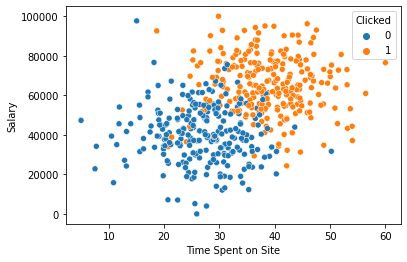

In [75]:
sns.scatterplot(training_set['Time Spent on Site'], training_set['Salary'], hue = training_set['Clicked'])

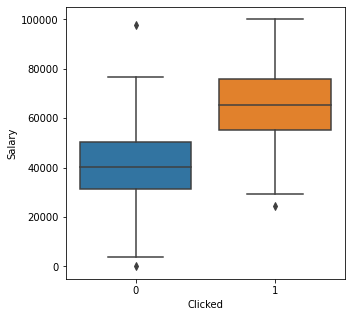

In [76]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Clicked', y='Salary',data=training_set)

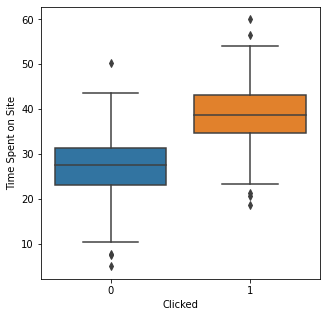

In [77]:
plt.figure(figsize=(5, 5))
sns.boxplot(x='Clicked', y='Time Spent on Site',data=training_set)

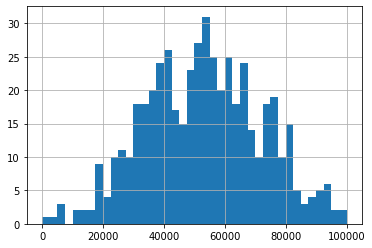

In [78]:
training_set['Salary'].hist(bins = 40)

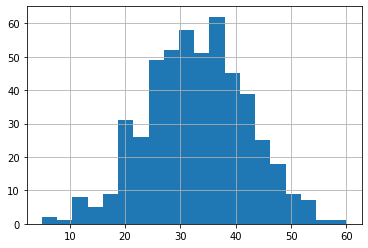

In [79]:
training_set['Time Spent on Site'].hist(bins = 20)

In [80]:
#Let's drop the emails, country and names (we can make use of the country later!)
training_set.drop(['Names', 'emails', 'Country'],axis=1,inplace=True)

In [81]:
training_set

,Time Spent on Site,Salary,Clicked
0,25.649648,55330.06006,0
1,32.456107,79049.07674,1
2,20.945978,41098.60826,0
3,54.039325,37143.35536,1
4,34.249729,37355.11276,0
...,...,...,...
494,19.222746,44969.13495,0
495,22.665662,41686.20425,0
496,35.320239,23989.80864,0
497,26.539170,31708.57054,0


In [83]:
#Let's drop the target coloumn before we do train test split
X = training_set.drop('Clicked',axis=1).values
y = training_set['Clicked'].values

In [84]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
X_train

array([[ 1.42362615e+00,  2.28294560e+00],
       [ 1.27842887e+00,  6.42418929e-01],
       [ 9.38760851e-01,  1.21381549e+00],
       [ 5.41314780e-01,  2.60639388e-01],
       [ 1.09531908e+00,  4.75030899e-01],
       [-1.31149405e+00, -8.81682059e-01],
       [ 3.95482032e-01,  1.85281787e+00],
       [ 1.23876495e+00,  6.50963986e-01],
       [ 3.93751298e-01, -2.41424855e-01],
       [-2.40764550e-01, -3.10185529e-01],
       [ 1.24585679e+00,  1.41180492e+00],
       [-7.96458904e-01, -1.21483411e+00],
       [-9.34969620e-01, -1.70625532e-01],
       [ 8.55264296e-01, -9.81324726e-01],
       [-1.91132465e-01,  4.15148736e-01],
       [-1.10130678e+00, -9.69857225e-01],
       [ 1.29105293e+00,  1.18761807e+00],
       [-5.13376111e-01,  2.30822516e-01],
       [ 1.50793876e+00,  5.77561928e-01],
       [-1.58972467e-01, -1.50307162e+00],
       [-8.42943155e-01, -4.29119606e-01],
       [ 3.71283295e-01, -1.24101139e+00],
       [-1.50339446e+00, -3.88461766e-01],
       [-1.

In [88]:
y_train

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

In [89]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,

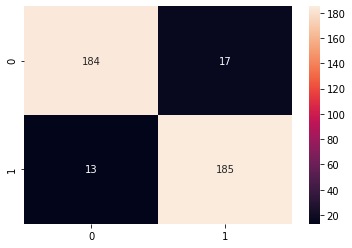

In [91]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

In [92]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1])

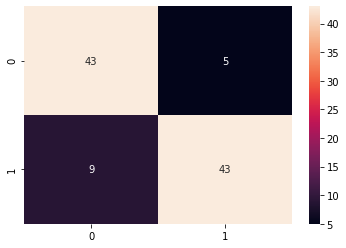

In [93]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [95]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

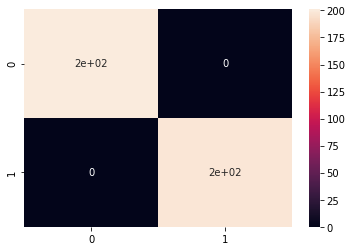

In [96]:
y_predict_train = RandomForest.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

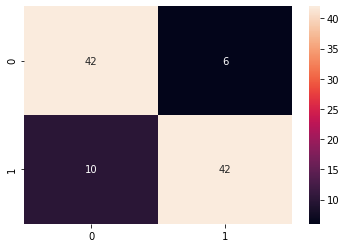

In [97]:
# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [98]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        48
           1       0.88      0.81      0.84        52

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100

